In [18]:
from scipy.stats import kstest, jarque_bera, shapiro
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv('the_final_merged_file.csv', sep='\t')
df

,name,grade,country,industry,employees,roe,Year,roe_num,global_industry,continent
0,"1-800-FLOWERS.COM, Inc.",22.6,United States of America,Retailing,"4,000",-2.07%,2024,-2.07,Consumer sectors (B2C),North America
1,1&1 AG,27.7,Germany,Telecommunication Services,"3,280",4.34%,2024,4.34,Technology sectors,Europe
2,"10X Genomics, Inc.",22.5,United States of America,Pharmaceuticals,"1,259",-24.87%,2024,-24.87,Healthcare and well-being,North America
3,11 Bit Studios SA,16.3,Poland,Software & Services,299,0.23%,2023,0.23,Technology sectors,Europe
4,1st Source Corp.,35.0,United States of America,Banks,"1,170",12.01%,2024,12.01,Financial sectors,North America
...,...,...,...,...,...,...,...,...,...,...
3808,"The Hyakugo Bank, Ltd.",27.5,Japan,Banks,"2,792",3.43%,2024,3.43,Financial sectors,Asia
3809,"The Hyakujushi Bank, Ltd.",29.0,Japan,Banks,"2,147",3.24%,2023,3.24,Financial sectors,Asia
3810,The Italian Sea Group SpA,30.2,Italy,Machinery,710,30.74%,2023,30.74,Industrial and manufacturing sectors,Europe
3811,The J. M. Smucker Co.,27.2,United States of America,Food Products,"9,000",-1.18%,2023,-1.18,Consumer sectors (B2C),North America


In [20]:
def check_normality(column):

    shap_stat, shap_p_value = shapiro(df[column])

    jarque_stat, jarque_p_value = jarque_bera(df[column])

    kol_stat, kol_p_value = kstest(df[column], 'norm')

    df_results = pd.DataFrame({
        'column': [column] * 3,
        'test': ['Shapiro-Wilk', 'Jarque-Bera', 'Kolmogorov-Smirnov'],
        'stat': [shap_stat, jarque_stat, kol_stat],
        'p_value': [np.round(shap_p_value, 2), np.round(jarque_p_value,2), np.round(kol_p_value,2)]
    })

    return df_results



df_norm = check_normality('roe_num')
df_norm

,column,test,stat,p_value
0,roe_num,Shapiro-Wilk,0.837926,0.0
1,roe_num,Jarque-Bera,8082.670970,0.0
2,roe_num,Kolmogorov-Smirnov,0.733971,0.0


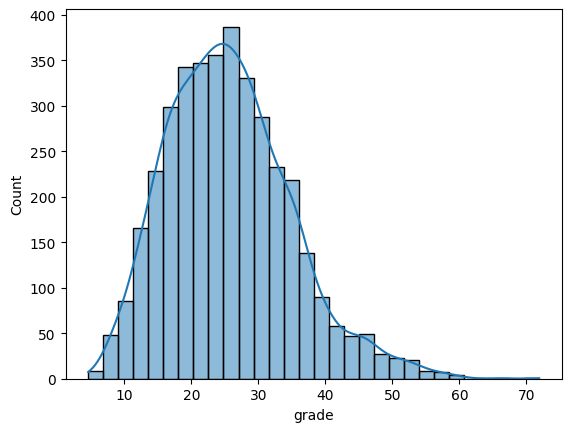

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['grade'], kde=True, bins=30)
plt.show()


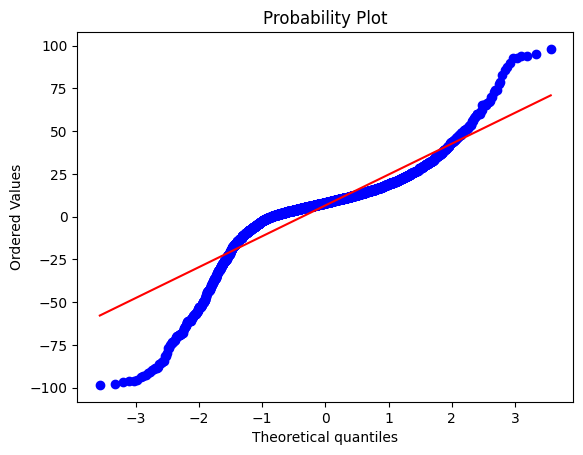

In [22]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(df['roe_num'], dist="norm", plot=plt)
plt.show()


In [32]:
from scipy.stats import spearmanr, kendalltau

def check_correlation(df , column1, column2):


    spearman_corr, spearman_p_value = spearmanr(df[column1], df[column2])
    kendall_corr, kendall_p_value = kendalltau(df[column1], df[column2])

    df_results = pd.DataFrame({
        'test': ['Spearman'],

        'correlation': [spearman_corr],
        'p_value': [np.round(spearman_p_value,2)]
    })

    return df_results

# df_analysis = df[(df['continent'] == 'Asia') 
#                  & (df['Year'] == 2023) 
#                  & (df['global_industry'] == 'Technology sectors')]

# df_analysis = df[(df['continent'] == 'Europe') & 
#                  (df['Year'] == 2024) 
#                  & (df['global_industry'] == 'Financial sectors')]

df_analysis = df[(df['continent'] == 'North America') & 
                 (df['Year'] == 2024) 
                 & (df['global_industry'] == 'Technology sectors')]

df_corr = check_correlation(df_analysis, 'roe_num', 'grade')
df_corr

,test,correlation,p_value
0,Spearman,-0.351302,0.0


In [24]:
def summarize_correlations(dataframe, column1, column2):
    """ 
    Cette fonction a pour but de résumer les corrélations pour chaque combinaison de continent, année et secteur

    dataframe : Le Dataframe que l'on souhaite analyser

    Return : Un Dataframe contenant les résultats

    """
    results = []
    for continent in dataframe['continent'].unique():
        for year in dataframe['Year'].unique():
            for sector in dataframe['global_industry'].unique():
                subset = dataframe[(dataframe['continent'] == continent) & 
                                   (dataframe['Year'] == year) & 
                                   (dataframe['global_industry'] == sector)]
                if len(subset) > 1:                     
                    corr, p_value = spearmanr(subset[column1], subset[column2])
                    result = {
                        'continent': continent,
                        'Year': year,
                        'sector': sector,
                        'correlation': np.round(corr, 2),
                        'p_value': np.round(p_value, 2),
                        'significant': p_value < 0.05,
                        'direction': 'positive' if corr > 0 else 'negative'
                    }
                    results.append(result)

    results_df = pd.DataFrame(results)
    return results_df

df_corr_global = summarize_correlations(df, 'roe_num', 'grade')
df_corr_global

,continent,Year,sector,correlation,p_value,significant,direction
0,North America,2024,Consumer sectors (B2C),-0.05,0.67,False,negative
1,North America,2024,Technology sectors,-0.35,0.00,True,negative
2,North America,2024,Healthcare and well-being,-0.33,0.00,True,negative
3,North America,2024,Financial sectors,-0.29,0.01,True,negative
4,North America,2024,Transport and logistics,-0.42,0.03,True,negative
5,North America,2024,Commercial services and media,0.04,0.83,False,positive
6,North America,2024,Real estate and related services,-0.03,0.81,False,negative
7,North America,2024,Industrial and manufacturing sectors,-0.15,0.26,False,negative
8,North America,2024,Utilities,0.20,0.32,False,positive
9,North America,2024,Energy and natural resources,0.07,0.59,False,positive


In [25]:
import plotly.express as px

def plot_significance_pie_charts(results_df):
    """ 
    Cette fonction a pour but  de créer des graphiques en camembert pour chaque continent afin de visualiser la proportion de corrélations significatives
    sur les 2 années étudiées

    results_df : Le Dataframe contenant les résultats des corrélations
    
    """
    results_df = results_df.copy()
    results_df['significant'] = results_df['significant'].map({True: 'Yes', False: 'No'})
    significance_counts = results_df.groupby(['continent', 'significant']).size().reset_index(name='count')
    
    for continent in results_df['continent'].unique():
        continent_data = significance_counts[significance_counts['continent'] == continent]
        fig = px.pie(
            continent_data, 
            names='significant', 
            values='count', 
            title=f'Significance Proportion for {continent}',
            labels={'significant': 'Significant', 'count': 'Count'}
        )

        fig.update_traces(textinfo='label+value')
        fig.update_layout(width=800, height=600, legend_title_text='Is there a correlation?')
        fig.show()
plot_significance_pie_charts(df_corr_global)

In [26]:
def calculate_true_false_percentage(dataframe):
    """
    Calcule le pourcentage de True (significatif) et False (non significatif) par continent, secteur, puis année.
    """

    dataframe['significant'] = dataframe['significant'].astype(bool)

    continent_significance = dataframe.groupby('continent')['significant'].agg([lambda x: (x==True).sum(), lambda x: (x==False).sum()])
    continent_significance.columns = ['True', 'False']
    continent_significance['True_percentage'] = (continent_significance['True'] / (continent_significance['True'] + continent_significance['False'])) * 100
    continent_significance['False_percentage'] = (continent_significance['False'] / (continent_significance['True'] + continent_significance['False'])) * 100
    continent_significance = continent_significance.reset_index()

    sector_significance = dataframe.groupby('sector')['significant'].agg([lambda x: (x==True).sum(), lambda x: (x==False).sum()])
    sector_significance.columns = ['True', 'False']
    sector_significance['True_percentage'] = (sector_significance['True'] / (sector_significance['True'] + sector_significance['False'])) * 100
    sector_significance['False_percentage'] = (sector_significance['False'] / (sector_significance['True'] + sector_significance['False'])) * 100
    sector_significance = sector_significance.reset_index()

    year_significance = dataframe.groupby('Year')['significant'].agg([lambda x: (x==True).sum(), lambda x: (x==False).sum()])
    year_significance.columns = ['True', 'False']
    year_significance['True_percentage'] = (year_significance['True'] / (year_significance['True'] + year_significance['False'])) * 100
    year_significance['False_percentage'] = (year_significance['False'] / (year_significance['True'] + year_significance['False'])) * 100
    year_significance = year_significance.reset_index()

    return continent_significance, sector_significance, year_significance

# Appliquer la fonction pour obtenir les pourcentages
continent_results, sector_results, year_results = calculate_true_false_percentage(df_corr_global)

# Afficher les résultats pour chaque niveau
print("Significance by Continent:")
print(continent_results)

print("\nSignificance by Sector:")
print(sector_results)

print("\nSignificance by Year:")
print(year_results)


Significance by Continent:
       continent  True  False  True_percentage  False_percentage
0           Asia     5     15             25.0              75.0
1         Europe     2     18             10.0              90.0
2  North America     8     12             40.0              60.0

Significance by Sector:
                                 sector  True  False  True_percentage  \
0         Commercial services and media     0      6         0.000000   
1                Consumer sectors (B2C)     2      4        33.333333   
2          Energy and natural resources     0      6         0.000000   
3                     Financial sectors     2      4        33.333333   
4             Healthcare and well-being     3      3        50.000000   
5  Industrial and manufacturing sectors     1      5        16.666667   
6      Real estate and related services     0      6         0.000000   
7                    Technology sectors     4      2        66.666667   
8               Transport and l

In [27]:
continent_results.sort_values(by='True_percentage', ascending=False, inplace=True)
continent_results

,continent,True,False,True_percentage,False_percentage
2,North America,8,12,40.0,60.0
0,Asia,5,15,25.0,75.0
1,Europe,2,18,10.0,90.0


In [28]:
sector_results.sort_values(by='True_percentage', ascending=False, inplace=True)
sector_results

,sector,True,False,True_percentage,False_percentage
7,Technology sectors,4,2,66.666667,33.333333
4,Healthcare and well-being,3,3,50.000000,50.000000
8,Transport and logistics,3,3,50.000000,50.000000
1,Consumer sectors (B2C),2,4,33.333333,66.666667
3,Financial sectors,2,4,33.333333,66.666667
5,Industrial and manufacturing sectors,1,5,16.666667,83.333333
0,Commercial services and media,0,6,0.000000,100.000000
2,Energy and natural resources,0,6,0.000000,100.000000
6,Real estate and related services,0,6,0.000000,100.000000
9,Utilities,0,6,0.000000,100.000000


In [29]:
year_results.sort_values(by='True_percentage', ascending=False, inplace=True)
year_results

,Year,True,False,True_percentage,False_percentage
1,2024,8,22,26.666667,73.333333
0,2023,7,23,23.333333,76.666667


C:\Users\PC\AppData\Local\Temp\ipykernel_7184\2978705829.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




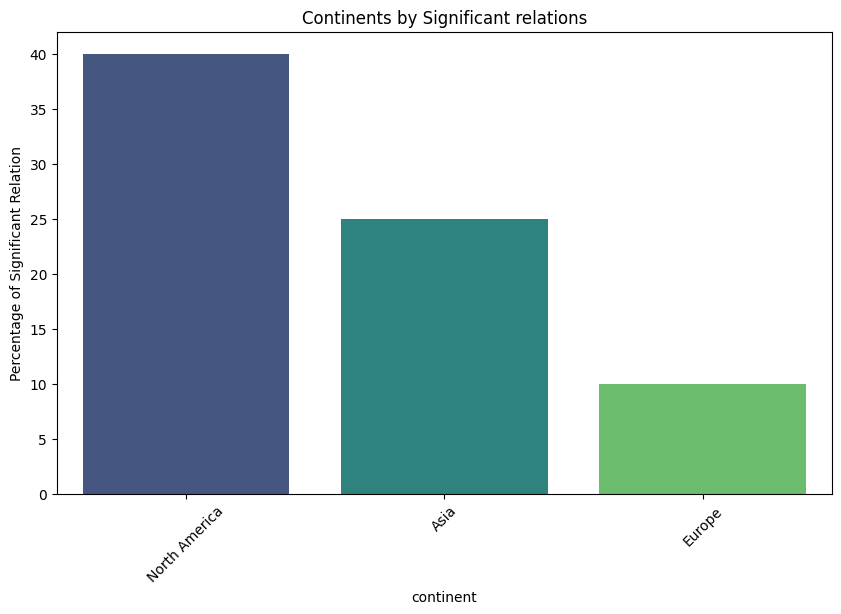

C:\Users\PC\AppData\Local\Temp\ipykernel_7184\2978705829.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




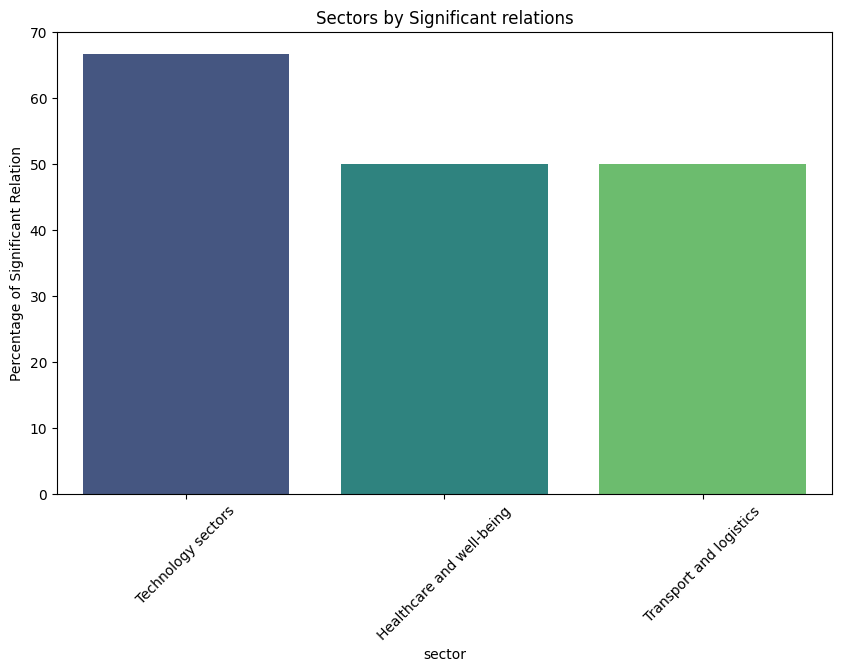

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_3_significance(dataframe, title, x_label, y_label):
    """
    Fonction pour tracer les 3 premiers résultats par pourcentage de True.
    """
    # Trier par pourcentage de True en ordre décroissant et prendre les 3 premiers
    top_3 = dataframe.sort_values(by='True_percentage', ascending=False).head(3)

    # Tracer les graphiques en barre
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_3[x_label], y=top_3['True_percentage'], palette="viridis")
    
    # Ajouter des labels et un titre
    plt.title(f'{title} by Significant relations')
    plt.xlabel(x_label)
    plt.ylabel('Percentage of Significant Relation')
    plt.xticks(rotation=45)
    plt.show()

# Pour les continents
plot_top_3_significance(continent_results, 'Continents', 'continent', 'True_percentage')

# Pour les secteurs
plot_top_3_significance(sector_results, 'Sectors', 'sector', 'True_percentage')
